In [131]:
import tensorflow as tf 
import plotly as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [136]:
df = pd.read_csv(r'D:\Time_series_project\BTC-USD.csv')
df_time = df.set_index('Date')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3480 non-null   object 
 1   Open       3480 non-null   float64
 2   High       3480 non-null   float64
 3   Low        3480 non-null   float64
 4   Close      3480 non-null   float64
 5   Adj Close  3480 non-null   float64
 6   Volume     3480 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 190.4+ KB


In [137]:
import plotly.express as px

fig = px.line(df, x='Date', y='Adj Close', title="BitCoin Adj closed price")
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()


In [138]:
def MACD(DF,a = 6,b= 13,c = 5):
    df = DF.copy()
    df['ma_fast'] = df['Adj Close'].ewm(span = a,min_periods = a).mean()
    df['ma_slow'] = df['Adj Close'].ewm(span = b,min_periods = b).mean()
    df['macd'] = df['ma_fast'] - df['ma_slow']
    df['macd_signal'] = df['macd'].ewm(span = 9, min_periods =c).mean()
    df = df.drop(columns = ['ma_fast', 'ma_slow', 'macd'] )
    return df

In [140]:
df= MACD(df)
df = df.set_index('Date')
df

,Open,High,Low,Close,Adj Close,Volume,macd_signal
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN
...,...,...,...,...,...,...,...
2024-03-23,63802.722656,65976.398438,63038.492188,64062.203125,64062.203125,24738964812,324.844177
2024-03-24,64070.753906,67622.757813,63825.851563,67234.171875,67234.171875,27206630673,181.539325
2024-03-25,67234.093750,71162.593750,66414.835938,69958.812500,69958.812500,42700139523,196.122554


<Axes: xlabel='Date'>

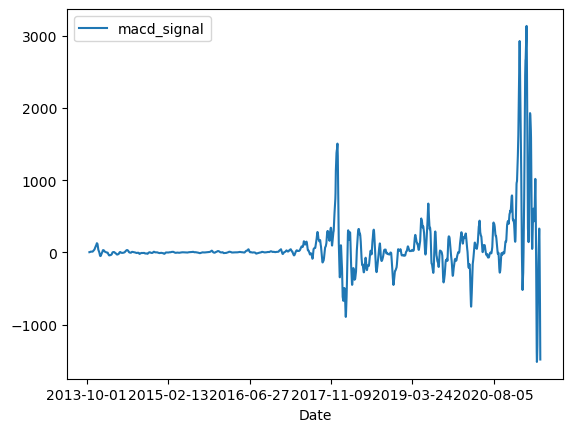

In [112]:
df[['macd_signal']].plot()

In [141]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'macd_signal'], dtype='object')

In [142]:
def ATR(Df, n =7):
    df = Df.copy()
    # ATR
    df['C_H - C_L'] = df['High'] - df['Low']
    df['C_H - P_C'] = df['High'] - df['Adj Close'].shift(1)
    df['C_L - P_C'] = df['Low'] - df['Adj Close'].shift(1)
    df['TR'] = df[['C_H - C_L', 'C_H - P_C', 'C_L - P_C']].max(axis = 1, skipna = False)
    df['ATR'] = df['TR'].ewm(span = n, min_periods = n).mean()
    df = df.drop(columns= ['C_H - C_L','C_H - P_C','C_L - P_C','TR'])
    return df

In [143]:
df = ATR(df)
df.head(15)

,Open,High,Low,Close,Adj Close,Volume,macd_signal,ATR
Date,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,NaN
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600,NaN,NaN
2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500,NaN,NaN
2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700,NaN,26.329379
2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400,NaN,22.918568


<Axes: xlabel='Date'>

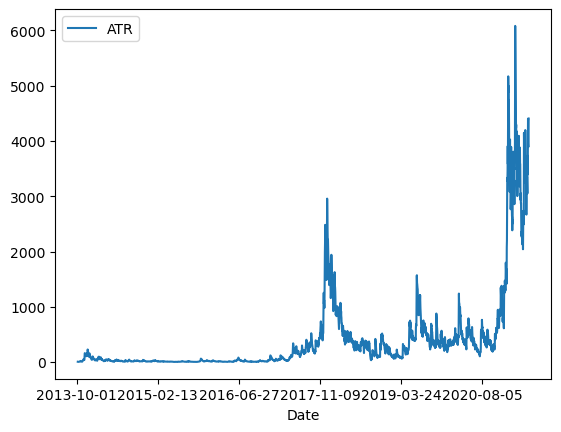

In [116]:
df[['ATR']].plot()

In [144]:
def BB(Df, n = 7):
    df = Df.copy()
    # BB
    df['MB'] = df['Adj Close'].rolling(n).mean()
    df['UB'] = df['MB'] + 2*df['Adj Close'].rolling(n).std(ddof = 0)
    df['LB'] = df['MB'] - 2*df['Adj Close'].rolling(n).std(ddof = 0)
    df['BB_width'] = df['UB'] - df['LB']
    
 

    return df

In [146]:
df = BB(df)
import plotly.graph_objects as go

# Assuming df_final is your DataFrame
# Create a Plotly figure
fig = go.Figure()

# Add traces for 'Appliances' and 'App_Pred

fig.add_trace(go.Scatter(x=df.index, y=df['Adj Close'], mode='lines', name='actual curve'))
fig.add_trace(go.Scatter(x=df.index, y=df['MB'], mode='lines', name='MB'))
fig.add_trace(go.Scatter(x=df.index, y=df['UB'], mode='lines', name='UB'))
fig.add_trace(go.Scatter(x=df.index, y=df['LB'], mode='lines', name='LB'))

# Update layout with titles and labels
fig.update_layout(title='BOlinger band',
                  xaxis_title='Time',
                  yaxis_title='Value',
                  xaxis=dict(rangeslider=dict(visible=True)))  # Add range slider

# Show the plot
fig.show()


In [147]:
df = df.drop(columns = ['MB', 'UB', 'LB'])
df

,Open,High,Low,Close,Adj Close,Volume,macd_signal,ATR,BB_width
Date,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,NaN,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,NaN,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,NaN,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-03-23,63802.722656,65976.398438,63038.492188,64062.203125,64062.203125,24738964812,324.844177,4292.217537,9099.495891
2024-03-24,64070.753906,67622.757813,63825.851563,67234.171875,67234.171875,27206630673,181.539325,4168.389715,8401.842008
2024-03-25,67234.093750,71162.593750,66414.835938,69958.812500,69958.812500,42700139523,196.122554,4313.231739,10267.562227


In [148]:
import numpy as np
def RSI(Df, n = 7):
    df = Df.copy()
    df['change'] = df['Adj Close'] - df['Adj Close'].shift(1)
    df["gain"] = np.where(df['change'] >=0, df['change'], 0)
    df["loss"] = np.where(df['change'] <=0, -1*df['change'], 0)
    df['avg_gain'] = df['gain'].ewm(alpha = 1/n, min_periods = n).mean()
    df['avg_loss'] = df['loss'].ewm(alpha = 1/n, min_periods = n).mean()
    df['rs'] = df['avg_gain']/df['avg_loss'] 
    df['RSI'] = 100 - (100/(1 + df['rs']))
    return df['RSI']

In [149]:
df['RSI'] = RSI(df)
df

,Open,High,Low,Close,Adj Close,Volume,macd_signal,ATR,BB_width,RSI
Date,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,NaN,NaN,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,NaN,NaN,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,NaN,NaN,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-03-23,63802.722656,65976.398438,63038.492188,64062.203125,64062.203125,24738964812,324.844177,4292.217537,9099.495891,43.087014
2024-03-24,64070.753906,67622.757813,63825.851563,67234.171875,67234.171875,27206630673,181.539325,4168.389715,8401.842008,53.373577
2024-03-25,67234.093750,71162.593750,66414.835938,69958.812500,69958.812500,42700139523,196.122554,4313.231739,10267.562227,60.523825


In [150]:
def ADX(Df, n=7):
    df = Df.copy()
    df['upmove'] = df['High'] - df['High'].shift()
    df['downmove'] = df['Low'].shift() - df['Low']
    df['+dm'] = np.where((df['upmove'] > df['downmove']) & (df['upmove'] > 0), df['upmove'], 0)
    df['-dm'] = np.where((df['downmove'] > df['upmove']) & (df['downmove'] > 0), df['downmove'], 0)
    df['+di'] = 100 * (df['+dm'] / df['ATR']).ewm(com=n, min_periods=n).mean()
    df['-di'] = 100 * (df['-dm'] / df['ATR']).ewm(com=n, min_periods=n).mean()
    df['DX'] = (abs(df['+di'] - df['-di']) / (df['+di'] + df['-di'])) * 100
    df['ADX'] = df['DX'].ewm(span=n, min_periods=n).mean()
    return df

In [151]:
df = ADX(df)
df

,Open,High,Low,Close,Adj Close,Volume,macd_signal,ATR,BB_width,RSI,upmove,downmove,+dm,-dm,+di,-di,DX,ADX
Date,,,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,NaN,NaN,NaN,-11.314026,39.317993,0.000000,39.317993,NaN,NaN,NaN,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,NaN,NaN,NaN,-29.024994,28.571991,0.000000,28.571991,NaN,NaN,NaN,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,NaN,NaN,NaN,-4.539001,-5.350983,0.000000,0.000000,NaN,NaN,NaN,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,NaN,NaN,NaN,-10.869995,-3.298004,0.000000,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-23,63802.722656,65976.398438,63038.492188,64062.203125,64062.203125,24738964812,324.844177,4292.217537,9099.495891,43.087014,-647.351562,-683.121094,0.000000,0.000000,9.535696,21.883271,39.299748,32.915397
2024-03-24,64070.753906,67622.757813,63825.851563,67234.171875,67234.171875,27206630673,181.539325,4168.389715,8401.842008,53.373577,1646.359375,-787.359375,1646.359375,0.000000,13.280771,19.147863,18.092319,29.209628
2024-03-25,67234.093750,71162.593750,66414.835938,69958.812500,69958.812500,42700139523,196.122554,4313.231739,10267.562227,60.523825,3539.835937,-2588.984375,3539.835937,0.000000,21.879328,16.754380,13.265484,25.223592


In [152]:

df.drop(columns= ['upmove','downmove', '+dm', '-dm', '+di', '-di', 'DX'],inplace= True)
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'macd_signal',
       'ATR', 'BB_width', 'RSI', 'ADX'],
      dtype='object')

In [153]:
bitcoin_price = pd.DataFrame(df[['Adj Close', 'macd_signal', 'ATR', 'BB_width', 'RSI', 'ADX']])
bitcoin_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3480 entries, 2014-09-17 to 2024-03-27
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Adj Close    3480 non-null   float64
 1   macd_signal  3464 non-null   float64
 2   ATR          3473 non-null   float64
 3   BB_width     3474 non-null   float64
 4   RSI          3474 non-null   float64
 5   ADX          3461 non-null   float64
dtypes: float64(6)
memory usage: 319.4+ KB


In [154]:
bitcoin_price.dropna(inplace= True)
bitcoin_price

,Adj Close,macd_signal,ATR,BB_width,RSI,ADX
Date,,,,,,
2014-10-06,330.079010,-13.890129,32.905061,104.264037,23.799725,84.257095
2014-10-07,336.187012,-14.656360,29.358803,92.157610,29.691793,85.132570
2014-10-08,352.940002,-14.339689,28.811808,72.794512,43.637524,78.476831
2014-10-09,365.026001,-13.083641,30.371388,63.545928,51.700811,64.107465
2014-10-10,361.562012,-11.538413,28.301766,64.896923,49.340515,53.700073
...,...,...,...,...,...,...
2024-03-23,64062.203125,324.844177,4292.217537,9099.495891,43.087014,32.915397
2024-03-24,67234.171875,181.539325,4168.389715,8401.842008,53.373577,29.209628
2024-03-25,69958.812500,196.122554,4313.231739,10267.562227,60.523825,25.223592


In [155]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(bitcoin_price)
data_scaled

array([[0.00208456, 0.51937729, 0.0042955 , 0.005595  , 0.1968617 ,
        0.88304702],
       [0.00216834, 0.51926301, 0.00379681, 0.00491876, 0.25977664,
        0.89300614],
       [0.00239814, 0.51931024, 0.00371989, 0.00383717, 0.40868782,
        0.81729263],
       ...,
       [0.95714052, 0.55069932, 0.60621253, 0.57329669, 0.58899812,
        0.21150117],
       [0.95753862, 0.56405323, 0.53192438, 0.53258819, 0.58979993,
        0.1861692 ],
       [0.96057166, 0.58200534, 0.4403612 , 0.59027244, 0.59679508,
        0.16717022]])

In [176]:
def get_labelled_window(x, horizon=1):
    return x[:, :-horizon], x[:, -horizon:]



def make_windows(x,window_size,horizon):
    #Create a window of specific window size (add the horizon to the end of the window for fuether labelling)
    window_step = np.expand_dims(np.arange(window_size+horizon), axis =0)
    # print(window_step)
    # create a 2D array of multiple window steps(minus 1 to account for 0 indexing)
    window_indexes = window_step + np.expand_dims(np.arange(len(x)- (window_size+horizon -1)),axis = 0).T
    # print(window_indexes)

    windowed_array = x[window_indexes]

    windows, labels = get_labelled_window(windowed_array,horizon=horizon )

    return windows, labels
window_size = 15
horizon = 7
full_windows, full_labels = make_windows(data_scaled, window_size=window_size, horizon=horizon)
full_windows.shape,full_labels.shape


((3440, 15, 6), (3440, 7, 6))